In [2]:
import pandas as pd
import numpy as np

# 1. Sales data

In [3]:
# --- Orders Data ---
# Contains records of each purchase
orders_data = {
    'OrderID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'CustomerID': ['C1', 'C2', 'C1', 'C3', 'C2', 'C1', 'C4', 'C4', 'C2', 'C3'],
    'ProductID': [101, 102, 103, 101, 104, 102, 105, 101, 103, 105],
    'Quantity': [2, 1, 5, 3, 2, 1, 1, 1, 3, 2],
    'OrderDate': pd.to_datetime(['2025-04-01', '2025-04-01', '2025-04-02', '2025-04-02', '2025-04-03', '2025-04-03', '2025-04-04', '2025-04-05', '2025-04-05', '2025-04-06'])
}
orders_df = pd.DataFrame(orders_data)

In [4]:
# --- Products Data ---
# Contains details for each product
products_data = {
    'ProductID': [101, 102, 103, 104, 105, 106],
    'ProductName': ['laptop', 'mouse', 'KEYBOARD', 'webcam', 'monitor', 'usb hub'],
    'Category': ['Electronics', 'Electronics', 'Electronics', 'Peripherals', 'Peripherals', 'Peripherals'],
    'UnitPrice': [1200, 25, 75, 50, -300, 20] # Note the negative price for a returned/refunded monitor
}
products_df = pd.DataFrame(products_data)

In [5]:
orders_df, products_df

(   OrderID CustomerID  ProductID  Quantity  OrderDate
 0        1         C1        101         2 2025-04-01
 1        2         C2        102         1 2025-04-01
 2        3         C1        103         5 2025-04-02
 3        4         C3        101         3 2025-04-02
 4        5         C2        104         2 2025-04-03
 5        6         C1        102         1 2025-04-03
 6        7         C4        105         1 2025-04-04
 7        8         C4        101         1 2025-04-05
 8        9         C2        103         3 2025-04-05
 9       10         C3        105         2 2025-04-06,
    ProductID ProductName     Category  UnitPrice
 0        101      laptop  Electronics       1200
 1        102       mouse  Electronics         25
 2        103    KEYBOARD  Electronics         75
 3        104      webcam  Peripherals         50
 4        105     monitor  Peripherals       -300
 5        106     usb hub  Peripherals         20)

#### 1. Data Preparation & Merging 🔗
Combine the orders_df and products_df into a single DataFrame named sales_df. The final DataFrame should only include products that appear in the orders data.

The ProductName column has inconsistent capitalization. Standardize all product names to be in title case (e.g., 'laptop' should become 'Laptop').

In [6]:
sales_df = pd.merge(orders_df ,products_df ,on='ProductID',how='inner')

In [7]:
sales_df['ProductName'] = sales_df['ProductName'].str.title()

In [8]:
sales_df

,OrderID,CustomerID,ProductID,Quantity,OrderDate,ProductName,Category,UnitPrice
0,1,C1,101,2,2025-04-01,Laptop,Electronics,1200
1,2,C2,102,1,2025-04-01,Mouse,Electronics,25
2,3,C1,103,5,2025-04-02,Keyboard,Electronics,75
3,4,C3,101,3,2025-04-02,Laptop,Electronics,1200
4,5,C2,104,2,2025-04-03,Webcam,Peripherals,50
5,6,C1,102,1,2025-04-03,Mouse,Electronics,25
6,7,C4,105,1,2025-04-04,Monitor,Peripherals,-300
7,8,C4,101,1,2025-04-05,Laptop,Electronics,1200
8,9,C2,103,3,2025-04-05,Keyboard,Electronics,75
9,10,C3,105,2,2025-04-06,Monitor,Peripherals,-300



#### 2. Feature Engineering 🛠️
Create a new column named TotalOrderPrice. This should be the result of multiplying the Quantity by the UnitPrice. Note that this value will be negative for refunded items.

In [9]:
sales_df['TotalOrderPrice'] = sales_df['Quantity']* sales_df['UnitPrice']

In [10]:
sales_df

,OrderID,CustomerID,ProductID,Quantity,OrderDate,ProductName,Category,UnitPrice,TotalOrderPrice
0,1,C1,101,2,2025-04-01,Laptop,Electronics,1200,2400
1,2,C2,102,1,2025-04-01,Mouse,Electronics,25,25
2,3,C1,103,5,2025-04-02,Keyboard,Electronics,75,375
3,4,C3,101,3,2025-04-02,Laptop,Electronics,1200,3600
4,5,C2,104,2,2025-04-03,Webcam,Peripherals,50,100
5,6,C1,102,1,2025-04-03,Mouse,Electronics,25,25
6,7,C4,105,1,2025-04-04,Monitor,Peripherals,-300,-300
7,8,C4,101,1,2025-04-05,Laptop,Electronics,1200,1200
8,9,C2,103,3,2025-04-05,Keyboard,Electronics,75,225
9,10,C3,105,2,2025-04-06,Monitor,Peripherals,-300,-600


#### 3. Data Analysis & Reporting 📊

Top Selling Products: Find the top 3 products that have generated the most revenue (i.e., have the highest total sum of TotalOrderPrice).

In [11]:
sales_df.groupby('ProductName')['TotalOrderPrice'].sum().sort_values(ascending=False).head(3)

ProductName
Laptop      7200
Keyboard     600
Webcam       100
Name: TotalOrderPrice, dtype: int64

Most Expensive Item per Category: For each product category, find the name of the product with the highest UnitPrice. (For this task, you should ignore refunded items, so only consider products with a positive UnitPrice).

In [12]:
sales_df.groupby('Category').apply(lambda x: x[x['UnitPrice'] > 0].loc[x['UnitPrice'].idxmax(), ['ProductName', 'UnitPrice']])

C:\Users\ATW\AppData\Local\Temp\ipykernel_6624\2462159148.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sales_df.groupby('Category').apply(lambda x: x[x['UnitPrice'] > 0].loc[x['UnitPrice'].idxmax(), ['ProductName', 'UnitPrice']])


,ProductName,UnitPrice
Category,,
Electronics,Laptop,1200
Peripherals,Webcam,50


In [13]:
sales_df

,OrderID,CustomerID,ProductID,Quantity,OrderDate,ProductName,Category,UnitPrice,TotalOrderPrice
0,1,C1,101,2,2025-04-01,Laptop,Electronics,1200,2400
1,2,C2,102,1,2025-04-01,Mouse,Electronics,25,25
2,3,C1,103,5,2025-04-02,Keyboard,Electronics,75,375
3,4,C3,101,3,2025-04-02,Laptop,Electronics,1200,3600
4,5,C2,104,2,2025-04-03,Webcam,Peripherals,50,100
5,6,C1,102,1,2025-04-03,Mouse,Electronics,25,25
6,7,C4,105,1,2025-04-04,Monitor,Peripherals,-300,-300
7,8,C4,101,1,2025-04-05,Laptop,Electronics,1200,1200
8,9,C2,103,3,2025-04-05,Keyboard,Electronics,75,225
9,10,C3,105,2,2025-04-06,Monitor,Peripherals,-300,-600


Customer Analysis: Identify any CustomerIDs who have a negative or zero total spending sum across all their orders. These could be customers who only returned items or whose refunds equal their purchases.

In [14]:
# First, group by CustomerID and sum their TotalOrderPrice
customer_spending = sales_df.groupby('CustomerID')['TotalOrderPrice'].sum()
customer_spending

CustomerID
C1    2800
C2     350
C3    3000
C4     900
Name: TotalOrderPrice, dtype: int64

In [15]:

# Now, filter this series to find customers with a total <= 0
negative_spenders = customer_spending[customer_spending <= 0]

print(negative_spenders)

Series([], Name: TotalOrderPrice, dtype: int64)


# 2. Stock Market Time Series Analysis 📈

Stock Market Time Series Analysis 📈

In [78]:
data = {
    'Date': pd.to_datetime([
        '2025-09-01', '2025-09-02', '2025-09-03', '2025-09-04', '2025-09-05',
        '2025-09-01', '2025-09-02', '2025-09-03', '2025-09-04', '2025-09-05',
        '2025-09-08', '2025-09-09', '2025-09-10', '2025-09-08', '2025-09-09'
    ]),
    'Ticker': [
        'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL',
        'GOOG', 'GOOG', 'GOOG', 'GOOG', 'GOOG',
        'AAPL', 'AAPL', 'AAPL', 'GOOG', 'GOOG'
    ],
    'Close': [150, 152, 151, 155, 157, 2800, 2810, 2815, 2790, 2785, 156, 159, 160, 2795, 2805],
    'Volume': [1.2, 1.3, 1.1, 1.5, 1.6, 0.8, 0.9, 1.0, 1.2, 1.1, 1.4, 1.7, 1.5, 1.3, 1.4]
}

stocks_df = pd.DataFrame(data)
# Volume is in millions
stocks_df['Volume'] = stocks_df['Volume'] * 1_000_000

This gives you a DataFrame with daily closing prices and trading volumes for Apple ('AAPL') and Google ('GOOG').

#### 1\. Data Preparation

  * To make time series operations easier, **set the `Date` column as the index** of the DataFrame.
  * The data is not in chronological order. **Sort the DataFrame by its index**.


In [79]:
stocks_df.index = stocks_df['Date']
stocks_df = stocks_df.sort_index()

In [80]:
# This is a more idiomatic way to achieve the same result
stocks_df = stocks_df.set_index('Date').sort_index()

In [81]:
stocks_df

,Ticker,Close,Volume
Date,,,
2025-09-01,AAPL,150,1200000.0
2025-09-01,GOOG,2800,800000.0
2025-09-02,AAPL,152,1300000.0
2025-09-02,GOOG,2810,900000.0
2025-09-03,AAPL,151,1100000.0
2025-09-03,GOOG,2815,1000000.0
2025-09-04,AAPL,155,1500000.0
2025-09-04,GOOG,2790,1200000.0
2025-09-05,AAPL,157,1600000.0


#### 2\. Technical Indicators

  * Calculate the **3-day moving average** of the `Close` price for each stock. A moving average helps smooth out price fluctuations. The result should be a new column named `MA_3_Day`. (Note: The first two days for each stock will have `NaN` values, which is expected).


In [82]:
stocks_df['MA_3_Day'] = stocks_df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=3).mean())

print(stocks_df)

           Ticker  Close     Volume     MA_3_Day
Date                                            
2025-09-01   AAPL    150  1200000.0          NaN
2025-09-01   GOOG   2800   800000.0          NaN
2025-09-02   AAPL    152  1300000.0          NaN
2025-09-02   GOOG   2810   900000.0          NaN
2025-09-03   AAPL    151  1100000.0   151.000000
2025-09-03   GOOG   2815  1000000.0  2808.333333
2025-09-04   AAPL    155  1500000.0   152.666667
2025-09-04   GOOG   2790  1200000.0  2805.000000
2025-09-05   AAPL    157  1600000.0   154.333333
2025-09-05   GOOG   2785  1100000.0  2796.666667
2025-09-08   AAPL    156  1400000.0   156.000000
2025-09-08   GOOG   2795  1300000.0  2790.000000
2025-09-09   AAPL    159  1700000.0   157.333333
2025-09-09   GOOG   2805  1400000.0  2795.000000
2025-09-10   AAPL    160  1500000.0   158.333333


For each stock, take the last 3 closing prices, average them, and put that number in a new column. If there aren’t 3 days yet, put NaN

In [83]:
stocks_df

,Ticker,Close,Volume,MA_3_Day
Date,,,,
2025-09-01,AAPL,150,1200000.0,NaN
2025-09-01,GOOG,2800,800000.0,NaN
2025-09-02,AAPL,152,1300000.0,NaN
2025-09-02,GOOG,2810,900000.0,NaN
2025-09-03,AAPL,151,1100000.0,151.000000
2025-09-03,GOOG,2815,1000000.0,2808.333333
2025-09-04,AAPL,155,1500000.0,152.666667
2025-09-04,GOOG,2790,1200000.0,2805.000000
2025-09-05,AAPL,157,1600000.0,154.333333


#### 3\. Time Series Analysis & Reporting

  * **Resample the data to find the average weekly `Close` price** for each stock.
  * For each stock (`Ticker`), find the date on which it had its **highest trading `Volume`**.
  * Calculate the total percentage change in price for each stock from its first recorded date to its last. The formula is `(last_price - first_price) / first_price * 100`.

In [67]:
# Weekly average Close price per stock
weekly_avg_close = (
    stocks_df
    .groupby('Ticker')
    .resample('W')['Close']
    .mean()
)

print(weekly_avg_close)


Ticker  Date      
AAPL    2025-09-07     153.000000
        2025-09-14     158.333333
GOOG    2025-09-07    2800.000000
        2025-09-14    2800.000000
Name: Close, dtype: float64


resample() only works when your DataFrame index is a DatetimeIndex.

In [60]:
highest_volume_rows = (
    stocks_df
    .groupby("Ticker", group_keys=False)
    .apply(lambda x: x.loc[x["Volume"].idxmax()])
)
print(highest_volume_rows)

C:\Users\ATW\AppData\Local\Temp\ipykernel_6624\154317282.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.loc[x["Volume"].idxmax()])


Group by ticker →
In each group pick the highest-Volume row →
Return all selected rows in a clean table

In [64]:
# 1) Reset index so idxmax returns integer row indices
df_reset = stocks_df.reset_index()    # Date becomes a column again

# 2) Get integer indices of max Volume row per Ticker
idxs = df_reset.groupby('Ticker')['Volume'].idxmax()

# 3) Select those rows and reset output indexing for a clean table
highest_volume_rows = df_reset.loc[idxs].reset_index(drop=True)

print(highest_volume_rows)


        Date Ticker  Close     Volume     MA_3_Day
0 2025-09-09   AAPL    159  1700000.0   157.333333
1 2025-09-09   GOOG   2805  1400000.0  2795.000000


In [84]:
price_change = stocks_df.groupby('Ticker')['Close'].agg(['first', 'last'])
price_change

,first,last
Ticker,,
AAPL,150,160
GOOG,2800,2805


In [85]:
price_change['pct_change'] = (price_change['last'] - price_change['first'])/price_change['first'] * 100
price_change

,first,last,pct_change
Ticker,,,
AAPL,150,160,6.666667
GOOG,2800,2805,0.178571


In [86]:
# assign pct_change to each row of the original df
stocks_df['pct_change'] = stocks_df['Ticker'].map(price_change['pct_change'])

In [87]:
stocks_df

,Ticker,Close,Volume,MA_3_Day,pct_change
Date,,,,,
2025-09-01,AAPL,150,1200000.0,NaN,6.666667
2025-09-01,GOOG,2800,800000.0,NaN,0.178571
2025-09-02,AAPL,152,1300000.0,NaN,6.666667
2025-09-02,GOOG,2810,900000.0,NaN,0.178571
2025-09-03,AAPL,151,1100000.0,151.000000,6.666667
2025-09-03,GOOG,2815,1000000.0,2808.333333,0.178571
2025-09-04,AAPL,155,1500000.0,152.666667,6.666667
2025-09-04,GOOG,2790,1200000.0,2805.000000,0.178571
2025-09-05,AAPL,157,1600000.0,154.333333,6.666667


# 3. Restaurant Order Analysis 🍽️

Restaurant Order Analysis 🍽️

In [92]:
data = {
    'Timestamp': pd.to_datetime([
        '2025-10-01 09:30', '2025-10-01 10:15', '2025-10-01 12:05',
        '2025-10-01 12:15', '2025-10-01 13:30', '2025-10-01 18:45',
        '2025-10-01 19:10', '2025-10-01 20:00', '2025-10-01 20:30',
        '2025-10-01 20:35'
    ]),
    'ItemName': ['Coffee', 'Pastry', ' Sandwich ', 'Salad', 'Coffee', 'Steak', ' Salad', 'Wine', 'Ice Cream', 'Steak'],
    'Category': ['Drink', 'Dessert', 'Main', 'Main', 'Drink', 'Main', 'Main', 'Drink', np.nan, 'Main'],
    'Price': [5, 4, 9, 8, 5, 25, 8, 12, 7, 25]
}

restaurant_df = pd.DataFrame(data)

#### 1\. Data Cleaning 🧼

  * The `ItemName` column has items with leading/trailing spaces. **Clean this column** to remove them (e.g., " Sandwich " should become "Sandwich").
  * The `Category` for "Ice Cream" is missing (`NaN`). **Fill this missing value with 'Dessert'**.

In [93]:
before = restaurant_df['ItemName'].apply(len)
after  = restaurant_df['ItemName'].str.strip().apply(len)

print(before - after)


0    0
1    0
2    2
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: ItemName, dtype: int64


In [ ]:
# restaurant_df['ItemName'] = restaurant_df['ItemName'].str.replace(" ", "")

In [89]:
restaurant_df['ItemName'] = restaurant_df['ItemName'].str.strip()

In [91]:
restaurant_df

,Timestamp,ItemName,Category,Price
0,2025-10-01 09:30:00,Coffee,Drink,5
1,2025-10-01 10:15:00,Pastry,Dessert,4
2,2025-10-01 12:05:00,Sandwich,Main,9
3,2025-10-01 12:15:00,Salad,Main,8
4,2025-10-01 13:30:00,Coffee,Drink,5
5,2025-10-01 18:45:00,Steak,Main,25
6,2025-10-01 19:10:00,Salad,Main,8
7,2025-10-01 20:00:00,Wine,Drink,12
8,2025-10-01 20:30:00,Ice Cream,NaN,7
9,2025-10-01 20:35:00,Steak,Main,25


.str = "string methods for a column"

.strip() = "cut the spaces at the ends"

.str.strip() = "cut spaces at the ends of every cell in the column"

In [95]:
restaurant_df.loc[restaurant_df['ItemName']=='Ice Cream', 'Category'] = 'Dessert'

In [96]:
restaurant_df

,Timestamp,ItemName,Category,Price
0,2025-10-01 09:30:00,Coffee,Drink,5
1,2025-10-01 10:15:00,Pastry,Dessert,4
2,2025-10-01 12:05:00,Sandwich,Main,9
3,2025-10-01 12:15:00,Salad,Main,8
4,2025-10-01 13:30:00,Coffee,Drink,5
5,2025-10-01 18:45:00,Steak,Main,25
6,2025-10-01 19:10:00,Salad,Main,8
7,2025-10-01 20:00:00,Wine,Drink,12
8,2025-10-01 20:30:00,Ice Cream,Dessert,7
9,2025-10-01 20:35:00,Steak,Main,25


#### 2\. Feature Engineering (Time & Binning) ⏳

  * Create a new column named `Hour` that extracts just the hour (as an integer) from the `Timestamp` column.
  * Create a new column named `TimeOfDay` by "binning" the `Hour` into the following custom time periods:
      * **'Morning'** (Hours 0-11)
      * **'Afternoon'** (Hours 12-17)
      * **'Evening'** (Hours 18-23)

In [ ]:
# restaurant_df['HourMinute'] = restaurant_df['Timestamp'].dt.strftime('%H:%M')

In [98]:
restaurant_df['Hour'] = restaurant_df['Timestamp'].dt.hour

In [ ]:
# restaurant_df['TimeOfDay'] = pd.cut(
#     restaurant_df['Hour'],
#     bins=[-1, 11, 17, 23],
#     labels=['Morning', 'Afternoon', 'Evening']
# ) #pd.cut splits a number into ranges

In [105]:
restaurant_df['TimeOfDay'] = restaurant_df['Hour'].apply(lambda h:
    'Morning' if 0 <= h < 12 else
    'Afternoon' if 12 <= h < 17 else
    'Evening' )

In [106]:
restaurant_df

,Timestamp,ItemName,Category,Price,Hour,TimeOfDay
0,2025-10-01 09:30:00,Coffee,Drink,5,9,Morning
1,2025-10-01 10:15:00,Pastry,Dessert,4,10,Morning
2,2025-10-01 12:05:00,Sandwich,Main,9,12,Afternoon
3,2025-10-01 12:15:00,Salad,Main,8,12,Afternoon
4,2025-10-01 13:30:00,Coffee,Drink,5,13,Afternoon
5,2025-10-01 18:45:00,Steak,Main,25,18,Evening
6,2025-10-01 19:10:00,Salad,Main,8,19,Evening
7,2025-10-01 20:00:00,Wine,Drink,12,20,Evening
8,2025-10-01 20:30:00,Ice Cream,Dessert,7,20,Evening
9,2025-10-01 20:35:00,Steak,Main,25,20,Evening


#### 3\. Data Analysis & Reporting 📊

  * **Peak Revenue:** Which `TimeOfDay` (Morning, Afternoon, or Evening) generated the most total revenue (`Price`)?
  * **Sales by Category:** Create a **pivot table** that shows the total revenue (`Price`) for each `Category` (as the rows) broken down by each `TimeOfDay` (as the columns).
  * **Most Popular Item:** What was the single most-ordered item (by count) during the **'Evening'**?

In [ ]:
# Filter for Evening rows first, then count ItemName
restaurant_df[restaurant_df['TimeOfDay'] == 'Evening']['ItemName'].count()

In [112]:
Most_popular_items = restaurant_df['ItemName'].value_counts().head(3)

In [107]:
restaurant_df.groupby('TimeOfDay')['Price'].sum()

TimeOfDay
Afternoon    22
Evening      77
Morning       9
Name: Price, dtype: int64

In [111]:
restaurant_df.pivot_table(index='Category', columns='TimeOfDay', values='Price', aggfunc='sum')

TimeOfDay,Afternoon,Evening,Morning
Category,,,
Dessert,NaN,7.0,4.0
Drink,5.0,12.0,5.0
Main,17.0,58.0,NaN


In [117]:
most_popular_evening = (
    restaurant_df
    .loc[restaurant_df['TimeOfDay'] == 'Evening', 'ItemName']
    .value_counts()
    .idxmax()
)

print("Most Popular Evening Item:", most_popular_evening)


Most Popular Evening Item: Steak


In [114]:
Most_popular_items

ItemName
Coffee        2
Steak         2
 Sandwich     1
Name: count, dtype: int64

# 4. Job Posting Analysis 👩‍💻

Job Posting Analysis 👩‍💻

In [150]:
data = {
    'PostingID': [1, 2, 3, 4, 5, 6, 7],
    'JobTitle': ['Senior Data Scientist', 'Data Analyst', 'Lead Data Engineer', 'Data Analyst', 'Jr. Software Engineer', 'Data Scientist', 'Software Engineer'],
    'SalaryRange': ['$120k - $150k', '$70,000 - $90,000', '130k-150k', '$75,000', np.nan, '$110,000 - $130,000', '$95,000'],
    'Skills': ['Python, R, SQL, ML', 'Excel, SQL, Power BI', 'Python, Spark, AWS, SQL', 'Excel, R, Tableau', 'Java, Python, Git', 'Python, ML, TensorFlow', 'Java, AWS, Docker']
}

jobs_df = pd.DataFrame(data)

#### 1\. Data Cleaning & Feature Engineering (Salary) 💰


  * The `SalaryRange` column is a messy string and has missing values.
  * Create a new column named `AvgSalary` (as an integer) by doing the following:
    1.  Remove all dollar signs (`$`) and 'k's.
    2.  If the value is a range (e.g., "120 - 150"), calculate the average.
    3.  If the value is a single number (e.g., "75,000"), use that number.
    4.  Handle missing (`NaN`) values by filling them with a 0 or the median/mean (your choice).
  * *Hint: You will likely need `.str.replace()`, `.str.split('-')`, and `.astype(float)`.*

In [151]:
# 1.  Remove all dollar signs (`$`) and 'k's.
jobs_df['AvgSalary'] = jobs_df['SalaryRange'].str.replace('[\$,]', '', regex=True).replace('[kK]','000', regex=True)

In [ ]:
# 2.  If the value is a range (e.g., "120 - 150"), calculate the average.
# # 3.  If the value is a single number (e.g., "75,000"), use that number.
# jobs_df['AvgSalary'] = jobs_df['AvgSalary'].str.split('-').apply(lambda x:None if pd.isna(x) 
#                                                                   else int(x[0]) if len(x)==1
#                                                                   else (int(x[0]) + int(x[1]))/2)

In [152]:
split = jobs_df['AvgSalary'].str.split('-', expand=True).astype(float)
jobs_df['AvgSalary'] = split.mean(axis=1)

In [153]:
# 4.  Handle missing (`NaN`) values by filling them with a 0 or the median/mean (your choice)
jobs_df['AvgSalary'] = jobs_df['AvgSalary'].fillna(jobs_df['AvgSalary'].mean())

In [154]:
jobs_df

,PostingID,JobTitle,SalaryRange,Skills,AvgSalary
0,1,Senior Data Scientist,$120k - $150k,"Python, R, SQL, ML",135000.0
1,2,Data Analyst,"$70,000 - $90,000","Excel, SQL, Power BI",80000.0
2,3,Lead Data Engineer,130k-150k,"Python, Spark, AWS, SQL",140000.0
3,4,Data Analyst,"$75,000","Excel, R, Tableau",75000.0
4,5,Jr. Software Engineer,NaN,"Java, Python, Git",107500.0
5,6,Data Scientist,"$110,000 - $130,000","Python, ML, TensorFlow",120000.0
6,7,Software Engineer,"$95,000","Java, AWS, Docker",95000.0


#### 2\. String Manipulation (Regex) 🔍


  * Create a new column named `Seniority` by extracting the seniority level from the `JobTitle` column. Use the following logic:
      * If 'Senior' or 'Lead' is in the title, set `Seniority` to 'Senior'.
      * If 'Jr.' or 'Junior' is in the title, set `Seniority` to 'Junior'.
      * Otherwise, set `Seniority` to 'Mid-level'.

In [156]:
jobs_df['Seniority'] = jobs_df['JobTitle'].str.lower().apply(lambda x:
    'Senior' if 'senior' in x or 'lead' in x else
    'Junior' if 'jr.' in x or 'junior' in x else
    'Mid-Level'
)

In [157]:
jobs_df

,PostingID,JobTitle,SalaryRange,Skills,AvgSalary,Seniority
0,1,Senior Data Scientist,$120k - $150k,"Python, R, SQL, ML",135000.0,Senior
1,2,Data Analyst,"$70,000 - $90,000","Excel, SQL, Power BI",80000.0,Mid-Level
2,3,Lead Data Engineer,130k-150k,"Python, Spark, AWS, SQL",140000.0,Senior
3,4,Data Analyst,"$75,000","Excel, R, Tableau",75000.0,Mid-Level
4,5,Jr. Software Engineer,NaN,"Java, Python, Git",107500.0,Junior
5,6,Data Scientist,"$110,000 - $130,000","Python, ML, TensorFlow",120000.0,Mid-Level
6,7,Software Engineer,"$95,000","Java, AWS, Docker",95000.0,Mid-Level


#### 3\. Handling List-like Data (Explode) 💥

  * The `Skills` column is a single string. First, convert this column so each row's `Skills` value is a **list of strings** (e.g., `['Python', 'R', 'SQL', 'ML']`).
  * Once you have the list, "explode" the DataFrame on this `Skills` column. This will create a new row for each skill, duplicating the other job information.

In [158]:
jobs_df['Skills'] = jobs_df['Skills'].str.split(', ')

In [161]:
jobs_df_exploded = jobs_df.explode('Skills')

In [162]:
jobs_df_exploded

,PostingID,JobTitle,SalaryRange,Skills,AvgSalary,Seniority
0,1,Senior Data Scientist,$120k - $150k,Python,135000.0,Senior
0,1,Senior Data Scientist,$120k - $150k,R,135000.0,Senior
0,1,Senior Data Scientist,$120k - $150k,SQL,135000.0,Senior
0,1,Senior Data Scientist,$120k - $150k,ML,135000.0,Senior
1,2,Data Analyst,"$70,000 - $90,000",Excel,80000.0,Mid-Level
1,2,Data Analyst,"$70,000 - $90,000",SQL,80000.0,Mid-Level
1,2,Data Analyst,"$70,000 - $90,000",Power BI,80000.0,Mid-Level
2,3,Lead Data Engineer,130k-150k,Python,140000.0,Senior
2,3,Lead Data Engineer,130k-150k,Spark,140000.0,Senior
2,3,Lead Data Engineer,130k-150k,AWS,140000.0,Senior


#### 4\. Analysis 📊

  * After exploding the DataFrame, find the **top 3 most in-demand skills** (i.e., the skills that appear most frequently across all postings).

<Axes: ylabel='Skills'>

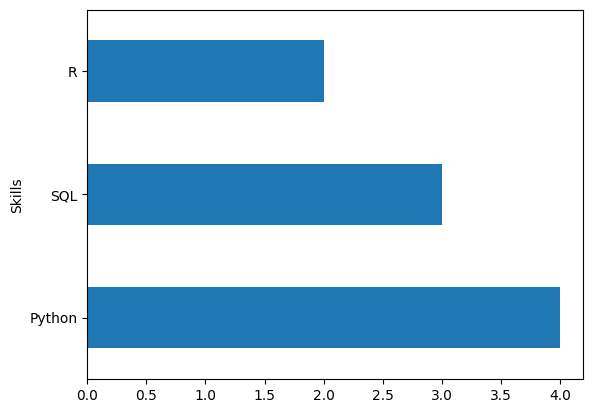

In [165]:
jobs_df_exploded.Skills.value_counts().head(3).plot(kind='barh')

# 5. Website Traffic Analysis 🌐

In [2]:
import pandas as pd
import numpy as np

data = {
    'SessionID': range(1, 16),
    'UserID': ['U101', 'U102', 'U101', 'U103', 'U102', 'U101', 'U104', 'U103', 'U101', 'U102', 'U105', 'U104', 'U103', 'U102', 'U101'],
    'Timestamp': pd.to_datetime([
        '2025-11-01 08:30', '2025-11-01 09:15', '2025-11-01 09:45', '2025-11-01 10:00', '2025-11-01 11:30',
        '2025-11-02 14:00', '2025-11-02 14:15', '2025-11-02 15:00', '2025-11-02 18:00', '2025-11-03 09:00',
        '2025-11-03 09:10', '2025-11-03 10:30', '2025-11-03 11:00', '2025-11-03 12:00', '2025-11-03 13:00'
    ]),
    'DeviceType': ['Mobile', 'Desktop', 'Mobile', 'Mobile', 'desktop', 'Tablet', 'Mobile', 'Desktop', 'Mobile', 'Mobile', 'Tablet', 'Mobile', 'Desktop', 'desktop', 'Mobile'],
    'Duration_sec': [120, 300, 180, 60, 450, 900, 240, 120, 600, 300, 150, 400, 300, 200, 100],
    'Purchased': [0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0]
}

traffic_df = pd.DataFrame(data)

#### 1\. Data Cleaning & Preparation 🧹

  * The `DeviceType` column is messy. **Standardize it** by:
    1.  Converting all values to lowercase.
    2.  Replacing 'desktop' with 'Desktop'.
  * After cleaning, **convert the `DeviceType` column to a `category` dtype** to save memory, as it has low cardinality.
  * Create a new column named `DayOfWeek` that contains the name of the weekday (e.g., 'Monday', 'Tuesday') from the `Timestamp`.

In [3]:
traffic_df['DeviceType'] = traffic_df['DeviceType'].str.lower()
traffic_df['DeviceType'] = traffic_df['DeviceType'].replace('desktop', 'Desktop')


In [4]:
traffic_df.DeviceType = traffic_df.DeviceType.astype('category')

In [5]:
traffic_df['DayOfWeek'] = traffic_df['Timestamp'].dt.day_name()

In [6]:
traffic_df

,SessionID,UserID,Timestamp,DeviceType,Duration_sec,Purchased,DayOfWeek
0,1,U101,2025-11-01 08:30:00,mobile,120,0,Saturday
1,2,U102,2025-11-01 09:15:00,Desktop,300,1,Saturday
2,3,U101,2025-11-01 09:45:00,mobile,180,0,Saturday
3,4,U103,2025-11-01 10:00:00,mobile,60,0,Saturday
4,5,U102,2025-11-01 11:30:00,Desktop,450,1,Saturday
5,6,U101,2025-11-02 14:00:00,tablet,900,1,Sunday
6,7,U104,2025-11-02 14:15:00,mobile,240,0,Sunday
7,8,U103,2025-11-02 15:00:00,Desktop,120,0,Sunday
8,9,U101,2025-11-02 18:00:00,mobile,600,1,Sunday
9,10,U102,2025-11-03 09:00:00,mobile,300,1,Monday


#### 2\. Advanced Aggregation (Groupby & Agg) 📊

  * Your manager wants a summary of user activity. **Create a new DataFrame called `user_summary`** by grouping `traffic_df` by `UserID`.
  * This new `user_summary` DataFrame should have the following aggregated columns for each user:
      * `TotalSessions`: The total count of sessions.
      * `TotalDuration_min`: The total sum of their `Duration_sec`, converted to minutes.
      * `TotalPurchases`: The total sum of their purchases.
      * `UniqueDevices`: The count of unique devices they used.


In [7]:
user_summary = traffic_df.groupby('UserID').agg(
    TotalSessions=('SessionID', 'count'),
    TotalDuration_min = ('Duration_sec', lambda x: x.sum() / 60),
    TotalPurchases = ('Purchased', 'sum'),
    UniqueDevices = ('DeviceType', 'nunique')
)

In [8]:
user_summary

,TotalSessions,TotalDuration_min,TotalPurchases,UniqueDevices
UserID,,,,
U101,5,31.666667,2,2
U102,4,20.833333,3,2
U103,3,8.000000,0,2
U104,2,10.666667,1,1
U105,1,2.500000,0,1


#### 3\. Data Analysis 📈

  * Based on your `user_summary` DataFrame, **which `UserID` is the "most valuable"** (defined as having the highest `TotalPurchases`)?
  * What was the **average session duration (in seconds)** for each `DeviceType` on 'Saturday' (which is '2025-11-01')?

In [9]:
# user_summary.sort_values('TotalPurchases', ascending=False).head(1)
# user_summary.loc[user_summary['TotalPurchases'].idxmax()]
user_summary['TotalPurchases'].idxmax()

'U102'

In [13]:
sat_df = traffic_df[traffic_df['Timestamp'].dt.day_name() == 'Saturday']

In [15]:
sat_df.groupby('DeviceType').agg(
    AvgDuration_min = ('Duration_sec', lambda x: x.mean() / 60))

C:\Users\ATW\AppData\Local\Temp\ipykernel_5496\1455560329.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sat_df.groupby('DeviceType').agg(


,AvgDuration_min
DeviceType,
Desktop,6.25
mobile,2.00
tablet,NaN


# 6 Student Grades Analysis (Reshaping Data)

Goal: Transform "wide" data into "long" format to perform aggregation.

In [5]:
import pandas as pd
import numpy as np

# --- 1. Setup Data ---
data = {
    'StudentID': [101, 102, 103, 104, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Math_Score': [85, 90, 78, 92, 88],
    'Science_Score': [90, 85, 80, 95, 82],
    'English_Score': [88, 92, 85, 89, 90],
    'History_Score': [70, 65, 95, 100, np.nan] # Eve missed the History test
}

grades_df = pd.DataFrame(data)

# Check the initial wide format
print("Original DataFrame:")
display(grades_df) # or print(grades_df)

Original DataFrame:


,StudentID,Name,Math_Score,Science_Score,English_Score,History_Score
0,101,Alice,85,90,88,70.0
1,102,Bob,90,85,92,65.0
2,103,Charlie,78,80,85,95.0
3,104,David,92,95,89,100.0
4,105,Eve,88,82,90,NaN


## 1. Reshape the DataFrame from 'wide' to 'long' format.
-    Instead of separate columns for each subject, create two new columns: 
-    'Subject' (containing the subject name) and 'Score' (containing the grade).
-    Hint: Use pd.melt()

In [7]:
grades_df = pd.melt(grades_df , id_vars=['StudentID', 'Name'],
        value_vars=['Math_Score', 'Science_Score', 'English_Score', 'History_Score'],
        var_name='Subject', value_name='Score')

In [8]:
grades_df

,StudentID,Name,Subject,Score
0,101,Alice,Math_Score,85.0
1,102,Bob,Math_Score,90.0
2,103,Charlie,Math_Score,78.0
3,104,David,Math_Score,92.0
4,105,Eve,Math_Score,88.0
5,101,Alice,Science_Score,90.0
6,102,Bob,Science_Score,85.0
7,103,Charlie,Science_Score,80.0
8,104,David,Science_Score,95.0
9,105,Eve,Science_Score,82.0


## 2. Data Cleaning: 
-    Remove any rows where the 'Score' is NaN (missing).

In [9]:
grades_df.dropna()

,StudentID,Name,Subject,Score
0,101,Alice,Math_Score,85.0
1,102,Bob,Math_Score,90.0
2,103,Charlie,Math_Score,78.0
3,104,David,Math_Score,92.0
4,105,Eve,Math_Score,88.0
5,101,Alice,Science_Score,90.0
6,102,Bob,Science_Score,85.0
7,103,Charlie,Science_Score,80.0
8,104,David,Science_Score,95.0
9,105,Eve,Science_Score,82.0


## 3. Analysis:
-    Calculate the average (mean) score for each 'Subject'.

In [10]:
grades_df.groupby('Subject')['Score'].mean()

Subject
English_Score    88.8
History_Score    82.5
Math_Score       86.6
Science_Score    86.4
Name: Score, dtype: float64

## 4. Filtering:
-    Find the name of the student who achieved the highest score specifically in 'Math_Score'.

In [13]:
grades_df['Score'].idxmax()

18

In [18]:
grades_df.loc[grades_df[grades_df['Subject']=='Math_Score']['Score'].idxmax()]

StudentID           104
Name              David
Subject      Math_Score
Score              92.0
Name: 3, dtype: object

# 7.Bank Account Analysis (Window Functions)

Goal: Perform order-dependent calculations like running totals and lag features using grouping.

In [19]:
import pandas as pd

# --- 1. Setup Data ---
data = {
    'AccountID': [1, 1, 1, 1, 1, 2, 2, 2, 2],
    'TransactionDate': pd.to_datetime([
        '2025-01-01', '2025-01-02', '2025-01-05', '2025-01-10', '2025-01-12',
        '2025-01-01', '2025-01-03', '2025-01-04', '2025-01-08'
    ]),
    'Type': ['Deposit', 'Withdrawal', 'Deposit', 'Withdrawal', 'Deposit', 'Deposit', 'Withdrawal', 'Withdrawal', 'Deposit'],
    'Amount': [1000, -200, 500, -1200, 300, 2000, -500, -100, 600]
}

bank_df = pd.DataFrame(data)

In [20]:
bank_df

,AccountID,TransactionDate,Type,Amount
0,1,2025-01-01,Deposit,1000
1,1,2025-01-02,Withdrawal,-200
2,1,2025-01-05,Deposit,500
3,1,2025-01-10,Withdrawal,-1200
4,1,2025-01-12,Deposit,300
5,2,2025-01-01,Deposit,2000
6,2,2025-01-03,Withdrawal,-500
7,2,2025-01-04,Withdrawal,-100
8,2,2025-01-08,Deposit,600



## 1. Preparation:
-    Sort the DataFrame by 'AccountID' and 'TransactionDate' to ensure chronological order.

In [21]:
bank_df = bank_df.sort_values(['AccountID', 'TransactionDate'])

In [22]:
bank_df

,AccountID,TransactionDate,Type,Amount
0,1,2025-01-01,Deposit,1000
1,1,2025-01-02,Withdrawal,-200
2,1,2025-01-05,Deposit,500
3,1,2025-01-10,Withdrawal,-1200
4,1,2025-01-12,Deposit,300
5,2,2025-01-01,Deposit,2000
6,2,2025-01-03,Withdrawal,-500
7,2,2025-01-04,Withdrawal,-100
8,2,2025-01-08,Deposit,600


## 2. Feature Engineering (Running Balance):
-    Create a new column 'RunningBalance'. 
-    This should be the cumulative sum of 'Amount', calculated separately for each 'AccountID'.
-    Hint: groupby() and cumsum()

In [23]:
bank_df['RunningBalance'] = bank_df.sort_values('TransactionDate').groupby('AccountID')['Amount'].cumsum()

In [24]:
bank_df

,AccountID,TransactionDate,Type,Amount,RunningBalance
0,1,2025-01-01,Deposit,1000,1000
1,1,2025-01-02,Withdrawal,-200,800
2,1,2025-01-05,Deposit,500,1300
3,1,2025-01-10,Withdrawal,-1200,100
4,1,2025-01-12,Deposit,300,400
5,2,2025-01-01,Deposit,2000,2000
6,2,2025-01-03,Withdrawal,-500,1500
7,2,2025-01-04,Withdrawal,-100,1400
8,2,2025-01-08,Deposit,600,2000


## 3. Feature Engineering (Lag/Shift):
-    Create a new column 'PreviousAmount'. 
-    This should show the 'Amount' of the *previous* transaction for that specific account.
-    Hint: groupby() and shift()

In [25]:
bank_df['PreviousAmount'] = bank_df.groupby('AccountID')['Amount'].shift(1)

In [26]:
bank_df

,AccountID,TransactionDate,Type,Amount,RunningBalance,PreviousAmount
0,1,2025-01-01,Deposit,1000,1000,NaN
1,1,2025-01-02,Withdrawal,-200,800,1000.0
2,1,2025-01-05,Deposit,500,1300,-200.0
3,1,2025-01-10,Withdrawal,-1200,100,500.0
4,1,2025-01-12,Deposit,300,400,-1200.0
5,2,2025-01-01,Deposit,2000,2000,NaN
6,2,2025-01-03,Withdrawal,-500,1500,2000.0
7,2,2025-01-04,Withdrawal,-100,1400,-500.0
8,2,2025-01-08,Deposit,600,2000,-100.0


## 4. Alerting:
-    Filter the DataFrame to show only the rows where 'RunningBalance' is less than 200.

In [27]:
bank_df[bank_df['RunningBalance'] < 200]

,AccountID,TransactionDate,Type,Amount,RunningBalance,PreviousAmount
3,1,2025-01-10,Withdrawal,-1200,100,500.0


# 8


import duckdb
import pandas as pd
import numpy as np

# Connect to DuckDB
conn = duckdb.connect(database=':memory:', read_only=False)

data = {
    'StudentID': [101, 102, 103, 104, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Math_Score': [85, 90, 78, 92, 88],
    'Science_Score': [90, 85, 80, 95, 82],
    'English_Score': [88, 92, 85, 89, 90],
    'History_Score': [70, 65, 95, 100, np.nan] # Eve missed the History test
}

grades_df = pd.DataFrame(data)

# Register for SQL
conn.register('grades', grades_df)

print("--- Grades Table (Wide Format) ---")
print(grades_df)
```

### Your Tasks

1.  **Reshape (Wide to Long):**
      * **Pandas:** Use `pd.melt()` to transform the DataFrame so that instead of separate columns for each subject, you have two new columns: `Subject` and `Score`. (Keep `StudentID` and `Name` as identifier variables).
      * **SQL:** Use the `UNPIVOT` statement to achieve the same result.
2.  **Analysis:**
      * After reshaping, remove any rows where the `Score` is `NaN`.
      * Calculate the **average score per subject**.
3.  **Filtering:**
      * Find the name of the student who has the **highest score in 'Math\_Score'** specifically.

-----

## 2\. 💳 Problem 7: Bank Account Analysis (Window Functions)

**Concept:** This problem focuses on order-dependent calculations, such as running balances and comparing a row to the previous row.

### Setup Code

Run this to create the data.

```python
data = {
    'AccountID': [1, 1, 1, 1, 1, 2, 2, 2, 2],
    'TransactionDate': pd.to_datetime([
        '2025-01-01', '2025-01-02', '2025-01-05', '2025-01-10', '2025-01-12',
        '2025-01-01', '2025-01-03', '2025-01-04', '2025-01-08'
    ]),
    'Type': ['Deposit', 'Withdrawal', 'Deposit', 'Withdrawal', 'Deposit', 'Deposit', 'Withdrawal', 'Withdrawal', 'Deposit'],
    'Amount': [1000, -200, 500, -1200, 300, 2000, -500, -100, 600]
}

bank_df = pd.DataFrame(data)

# Register for SQL
conn.register('transactions', bank_df)

print("\n--- Bank Transactions Table ---")
print(bank_df)
```

### Your Tasks

1.  **Running Balance (Cumulative Sum):**
      * Calculate the **Running Balance** for each `AccountID` ordered by `TransactionDate`.
      * *Pandas Hint:* `.groupby().cumsum()`
      * *SQL Hint:* `SUM() OVER (PARTITION BY ... ORDER BY ...)`
2.  **Previous Transaction Comparison (Lag):**
      * Create a new column called `PreviousAmount` that shows the amount of the *previous* transaction for that specific account.
      * *Pandas Hint:* `.groupby().shift()`
      * *SQL Hint:* `LAG() OVER (...)`
3.  **Alerting:**
      * Identify any rows where the **Running Balance** drops below 200.

Good luck\! Let me know if you want the solution for either of these.